## 영상정보처리 11주차 과제 템플리트 
이름: 조민서            
학번: 32174224




# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/MyDrive/ImageProcClass/Notebook-Week11/

import cv2, numpy as np
import matplotlib.pyplot as plt

#print different pixels


def show_img_with_matplotlib_gray(img, title,pos):
  ax = plt.subplot(2, 3, pos)
  plt.imshow(img,cmap='gray')
  plt.title(title)
  plt.axis('off')


# image equivalence check


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/ImageProcClass/Notebook-Week11


In [2]:
image_path_airplane = '../Dongkeun-OpenCV-ImgData/airplane_bw.png'
image_path_horse = '../Dongkeun-OpenCV-ImgData/horse_bw.png'

다음 두 개의 이미지에 대해 스켈레톤을 구하는 프로세스를 작성하고, 결과를 가시화하시오.  

입력 이미지 - 이미지 폴더에 없는 경우, 첨부된 이미지를 다운받아 폴더에 넣고 실행하기
- airplane_bw.png
- horse_bw.png

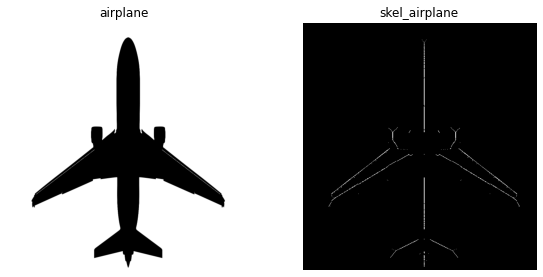

In [3]:
airplane = cv2.imread(image_path_airplane, cv2.IMREAD_GRAYSCALE)

ret, A = cv2.threshold(airplane, 128, 255, cv2.THRESH_BINARY)
A = cv2.bitwise_not(A)
skel_airplane = np.zeros(airplane.shape, np.uint8)

shape1=cv2.MORPH_CROSS
shape2=cv2.MORPH_RECT
B= cv2.getStructuringElement(shape=shape1, ksize=(3,3))
done = True
while done:   
    erode  = cv2.erode(A, B)                                               #1. erode하기(작은 노이즈들을 지운다. 흰부분이 점점 얇아진다.)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B)                   #2. opening (좁은 선들, 노이즈를 지운다) 
    tmp    = cv2.subtract(erode, opening)
    skel_airplane = cv2.bitwise_or(skel_airplane, tmp)                     #3. erode한 값에서 opening한 값을 뺀다.(점점 얇아짐)
    A = erode.copy()
    done = cv2.countNonZero(A) != 0                                        #4. 더이상 erode할 수 없을 때 까지 반복(마지막엔 뼈대만 남게됨)

fig = plt.figure(figsize=(15, 10))   

show_img_with_matplotlib_gray(airplane,  'airplane', 1)    
show_img_with_matplotlib_gray(skel_airplane,  'skel_airplane', 2)

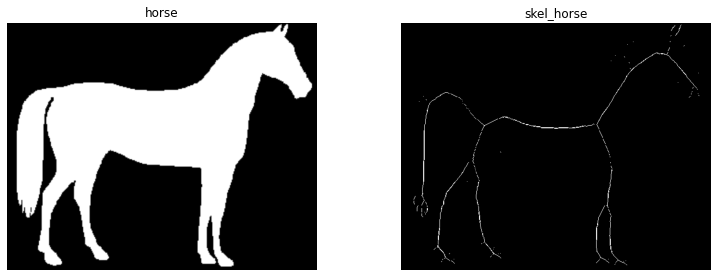

In [4]:
horse = cv2.imread(image_path_horse, cv2.IMREAD_GRAYSCALE)

ret, a = cv2.threshold(horse, 128, 255, cv2.THRESH_BINARY)
skel_horse = np.zeros(horse.shape, np.uint8)

shape1=cv2.MORPH_CROSS
shape2=cv2.MORPH_RECT
b= cv2.getStructuringElement(shape=shape1, ksize=(3,3))
done = True
while done:   
    erode  = cv2.erode(a, b)                                               #1. erode하기(작은 노이즈들을 지운다.)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, b)                   #2. opening (좁은 선들을 지운다) 
    tmp    = cv2.subtract(erode, opening)
    skel_horse = cv2.bitwise_or(skel_horse, tmp)                           #3. erode한 값에서 opening한 값을 뺀다.(점점 얇아짐)
    a = erode.copy()
    done = cv2.countNonZero(a) != 0                                        #4. 더이상 erode할 수 없을 때 까지 반복(마지막엔 뼈대만 남게됨)   

fig = plt.figure(figsize=(20, 10))   
    
show_img_with_matplotlib_gray(horse,  'horse', 1)    
show_img_with_matplotlib_gray(skel_horse,  'skel_horse', 2)

## 문제 2

"2021-1 ImgProc JB-CH07-JHU2104-V1.pdf" 에서 저자 구현 코드와 opencv 함수를 이용하는 방법 둘 다 이용해서 예시를 보여주고 있습니다. 저자 구현 코드와 opencv 를 이용한 방법의 결과를 디스플레이하고, 두 결과를 픽셀 단위로 비교하여 몇 개의 픽셀이 다른 지 계산하고, 픽셀이 다른 경우, 다른 부분만을 영상을 만들어 디스플레이 하시오. 
- 필요한 이미지는 '../Dongkeun-OpenCV-ImgData' 에 복사하여 넣어서 수행
 
1. 예제 7.2.5 (소벨 엣지 검출)
2. 예제 7.2.6 (라플라시안 엣지 검출)
3. 예제 7.2.8 (캐니 엣지 검출)


In [5]:
sobel_img_path = '../Dongkeun-OpenCV-ImgData/edge.jpg'
sobel_img = cv2.imread(sobel_img_path, cv2.IMREAD_GRAYSCALE)

lapla_img_path = '../Dongkeun-OpenCV-ImgData/laplacian.jpg'
lapla_img = cv2.imread(lapla_img_path, cv2.IMREAD_GRAYSCALE)

canny_img_path = '../Dongkeun-OpenCV-ImgData/canny.jpg'
canny_img = cv2.imread(canny_img_path, cv2.IMREAD_GRAYSCALE)

def filter(image, mask):

  rows, cols = image.shape
  dst = np.zeros((rows, cols), np.float32)                 # 회선 결과 저장 행렬
  xcenter, ycenter = mask.shape[1] // 2, mask.shape[0] // 2  # 마스크 중심 좌표

  for i in range(ycenter, rows - ycenter):                  # 입력 행렬 반복 순회
      for j in range(xcenter, cols - xcenter):
          y1, y2 = i - ycenter, i + ycenter + 1               # 관심영역 높이 범위
          x1, x2 = j - xcenter, j + xcenter + 1               # 관심영역 너비 범위

          roi = image[y1:y2, x1:x2].astype("float32")         # 관심영역 형변환
          tmp = cv2.multiply(roi, mask)                       # 회선 적용
          dst[i, j] = cv2.sumElems(tmp)[0]                    # 출력화소 저장

  return dst                     # 자료형 변환하여 반환

def differential(image, data1, data2):
    # 입력 인자로 마스크 행렬 초기화
  mask1 = np.array(data1, np.float32).reshape(3, 3)
  mask2 = np.array(data2, np.float32).reshape(3, 3)

    # 사용자 정의 회선 함수
  dst1 = filter(image, mask1)
  dst2 = filter(image, mask2)
  dst = cv2.magnitude(dst1, dst2);  # 회선 결과 두 행렬의 크기 계산

    # dst1, dst2 = np.abs(dst1), np.abs(dst2)  # 회선 결과 행렬 양수 변경
  dst = cv2.convertScaleAbs(dst)
  dst1 = cv2.convertScaleAbs(dst1)
  dst2 = cv2.convertScaleAbs(dst2)
    
  return dst, dst1, dst2

#count different pixels
def count_diff_pixel(img1,img2):
  difference = cv2.absdiff(img1, img2)
  num_diff = cv2.countNonZero(difference)
  print(num_diff)

# image equivalence check
def test_same_image(img1, img2):
  if img1 is None:
    print("test_same_image : img1 is None")

  if img2 is None:
    print("test_same_image : img2 is None")

  if img1.shape != img2.shape:
    print("img1.shape = ", img1.shape, " and img2.shape = ", img2.shape, ' are different') 
    return False

  for x in range(0, img1.shape[0]):
    for y in range(0, img1.shape[1]):
      if img1[x,y] != img2[x,y]:
        print("Not Identical!")
        return False
  print("Identical!")
  return True

1. 예제 7.2.5 (소벨 엣지 검출)

open cv sobel(x) and 만든 mask (x) 는 : Not Identical!
x방향 , (수직 mask) 동일 여부 및 화소 차이 : 582
open cv sobel(y) and 만든 mask (y) 는 : Not Identical!
y방향 (수평 mask) 동일 여부 및 화소 차이 : 653


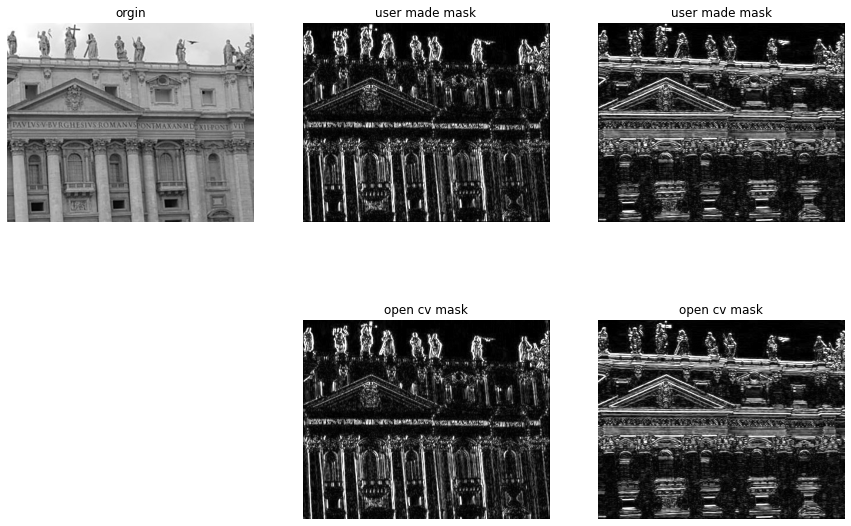

In [6]:
data1 = [-1, 0, 1,                  # 수직 마스크
         -2, 0, 2,
         -1, 0, 1]

data2 = [-1,-2,-1,                 # 수평 마스크
          0, 0, 0,
          1, 2, 1]

dst, dst1, dst2 = differential(sobel_img, data1, data2)     # 두 방향 회선 및 크기(에지 강도) 계산
# OpenCV 제공 소벨 에지 계산
dst3 = cv2.Sobel(np.float32(sobel_img), cv2.CV_32F, 1, 0, 3)  # x방향 미분 - 수직 마스크
dst4 = cv2.Sobel(np.float32(sobel_img), cv2.CV_32F, 0, 1, 3)  # y방향 미분 - 수평 마스크
dst3 = cv2.convertScaleAbs(dst3)                          # 절댓값 및 uint8 형변환
dst4 = cv2.convertScaleAbs(dst4)

fig = plt.figure(figsize=(15, 10)) 

show_img_with_matplotlib_gray(sobel_img,"orgin",1)
show_img_with_matplotlib_gray(dst1,  "user made mask", 2)    
show_img_with_matplotlib_gray(dst2,  "user made mask", 3)

show_img_with_matplotlib_gray(dst3,  "open cv mask", 5)    
show_img_with_matplotlib_gray(dst4,  "open cv mask", 6)

print("open cv sobel(x) and 만든 mask (x) 는 : ",end="")
test_same_image(dst1,dst3)
print("x방향 , (수직 mask) 동일 여부 및 화소 차이 : ",end="")
count_diff_pixel(dst1,dst3)

print("open cv sobel(y) and 만든 mask (y) 는 : ",end="")
test_same_image(dst2,dst4)
print("y방향 (수평 mask) 동일 여부 및 화소 차이 : ",end="")
count_diff_pixel(dst2,dst4)

2. 예제 7.2.6 (라플라시안 엣지 검출)


filter2D 4-direction , open cv Laplacian 는 : Identical!
filter2D 4-direction , open cv Laplacian의 화소 차이는 : 0
filter2D 8-direction , open cv Laplacian 는 : Not Identical!
filter2D 8-direction , open cv Laplacian의 화소 차이는 : 116688


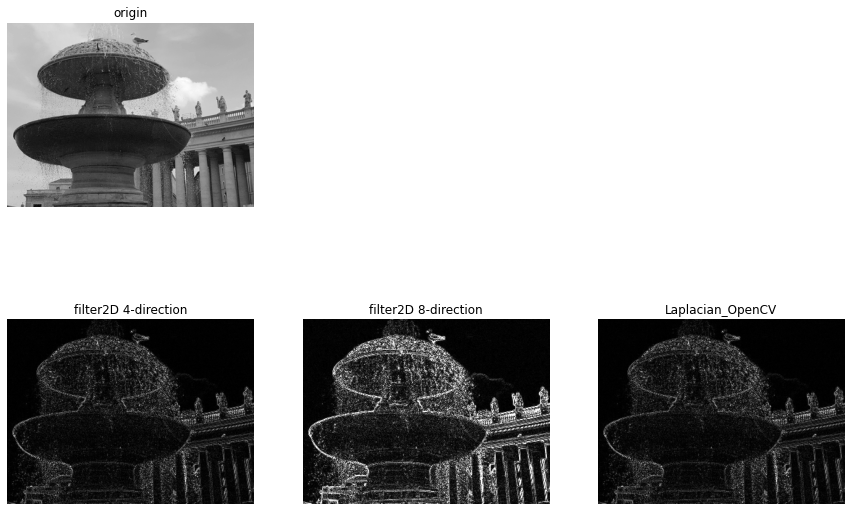

In [7]:
data1 = [	[0,		1,		0],  												# 4 방향 필터
			[1, 	-4,		1],
			[0, 	1,		0]]
data2 = [	[-1,	-1,		-1],													# 8 방향 필터
			[-1, 	8, 	    -1],
			[-1, 	-1, 	-1]]
mask4 = np.array(data1, np.int16)   # 음수가 있으므로 자료형이 int8인 행렬 선언
mask8 = np.array(data2, np.int16)
# OpenCV 함수 cv2.filter2D() 통한 라플라시안 수행
dst1 = cv2.filter2D(lapla_img, cv2.CV_16S, mask4)
dst2 = cv2.filter2D(lapla_img, cv2.CV_16S, mask8)
dst3 = cv2.Laplacian(lapla_img, cv2.CV_16S, 1)      # OpenCV 라플라시안 수행 함

fig = plt.figure(figsize=(15, 10)) 

print("filter2D 4-direction , open cv Laplacian 는 : ",end="")
test_same_image(dst1,dst3)
print("filter2D 4-direction , open cv Laplacian의 화소 차이는 : ",end="")
count_diff_pixel(dst1,dst3)

print("filter2D 8-direction , open cv Laplacian 는 : ",end="")
test_same_image(dst2,dst3)
print("filter2D 8-direction , open cv Laplacian의 화소 차이는 : ",end="")
count_diff_pixel(dst2,dst3)

show_img_with_matplotlib_gray(lapla_img,"origin",1)
show_img_with_matplotlib_gray(cv2.convertScaleAbs(dst1),  'filter2D 4-direction', 4)
show_img_with_matplotlib_gray(cv2.convertScaleAbs(dst2),  'filter2D 8-direction', 5)
show_img_with_matplotlib_gray(cv2.convertScaleAbs(dst3),  'Laplacian_OpenCV', 6)


3. 예제 7.2.8 (캐니 엣지 검출)

만든 canny와 , open cv canny 는 : Not Identical!
만든 canny , open cv canny의 화소 차이는 : 1096


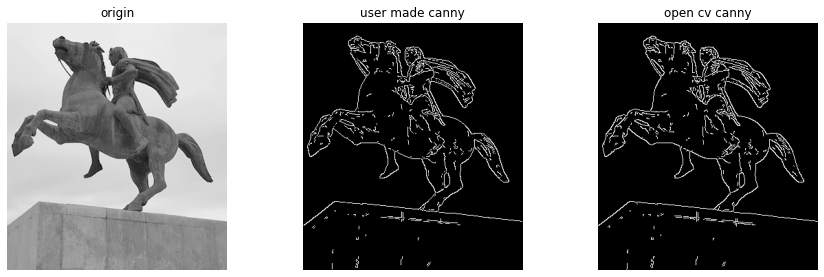

In [8]:

def nonmax_suppression(sobel, direct):
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2]
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]

            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0
    return dst

def trace(max_sobel, i, j, low):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        imple_canny[i, j] = 255

        trace(max_sobel, i - 1, j - 1, low)# 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low)
        trace(max_sobel, i + 1, j - 1, low)
        trace(max_sobel, i - 1, j    , low)
        trace(max_sobel, i + 1, j    , low)
        trace(max_sobel, i - 1, j + 1, low)
        trace(max_sobel, i    , j + 1, low)
        trace(max_sobel, i + 1, j + 1, low)

def hysteresis_th(max_sobel, low, high):                # 이력 임계값 수행
    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low)  # 추적 시작

pos_ck = np.zeros(canny_img.shape, np.uint8)
imple_canny = np.zeros(canny_img.shape, np.uint8)

# 사용자 정의 캐니 에지
gaus_img = cv2.GaussianBlur(canny_img, (5, 5), 0.3)
Gx = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 1, 0, 3)  # x방향 마스크
Gy = cv2.Sobel(np.float32(gaus_img), cv2.CV_32F, 0, 1, 3)  # y방향 마스크
sobel = np.fabs(Gx) + np.fabs(Gy)  # 두 행렬 절댓값 덧셈
# sobel = cv2.magnitude(Gx, Gy)                            # 두 행렬 벡터 크기

directs = cv2.phase(Gx, Gy) / (np.pi / 4)
directs = directs.astype(int) % 4
max_sobel = nonmax_suppression(sobel, directs)   # 비최대치 억제
hysteresis_th(max_sobel, 100, 150)          # 이력 임계값

open_canny = cv2.Canny(canny_img, 100, 150)                 # OpenCV 캐니 에지

fig = plt.figure(figsize=(15, 10)) 

show_img_with_matplotlib_gray(canny_img,'origin',1)
show_img_with_matplotlib_gray(imple_canny,  'user made canny', 2)    
show_img_with_matplotlib_gray(open_canny,  'open cv canny', 3)

print("만든 canny와 , open cv canny 는 : ",end="")
test_same_image(imple_canny,open_canny)
print("만든 canny , open cv canny의 화소 차이는 : ",end="")
count_diff_pixel(imple_canny,open_canny)